In [12]:
import pandas as pd

!pip install "altair[all]"
import altair as alt

import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [13]:
df = pd.read_csv("Daily_Inmates_In_Custody_20240702.csv", parse_dates=['ADMITTED_DT'])

#downloaded on July second, last updated on July first. So this are all the inmates in custody in NYC as on July 1 2024. 
#might change slightly by the time Trump is officially sentenced.

In [3]:
df.head()

,INMATEID,ADMITTED_DT,DISCHARGED_DT,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,INMATE_STATUS_CODE,SEALED,SRG_FLG,TOP_CHARGE,INFRACTION
0,90432,2024-05-09 01:38:40,NaN,MIN,N,B,M,43.0,DE,N,N,220.21,N
1,20206183,2024-03-09 00:42:00,NaN,MAX,N,B,M,25.0,DE,N,Y,265.03,N
2,160997,2024-06-12 21:17:00,NaN,MED,N,B,M,52.0,DE,N,N,135.20,N
3,20214579,2024-06-05 17:08:11,NaN,MIN,Y,O,M,61.0,DE,N,N,160.10,N
4,12292,2024-04-07 00:42:50,NaN,MAX,Y,B,M,35.0,DE,N,N,120.05,N


In [126]:
df.shape

#so there were 6427 inmates on July 1 2024... 
#This data set excludes Sealed Cases. Resulting summaries may differ slightly from other published statistics.
#Source: disclaimer docx on NYC OpenData

(6427, 13)

In [127]:
df.dtypes

INMATEID                       int64
ADMITTED_DT           datetime64[ns]
DISCHARGED_DT                float64
CUSTODY_LEVEL                 object
BRADH                         object
RACE                          object
GENDER                        object
AGE                          float64
INMATE_STATUS_CODE            object
SEALED                        object
SRG_FLG                       object
TOP_CHARGE                    object
INFRACTION                    object
dtype: object

In [128]:
df.info()

#so there are some missing values, for example TOP_CHARGE and CUSTODY_LEVEL
#none of them are discharged, so they are all in Null!
#which makes sense

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6427 entries, 0 to 6426
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   INMATEID            6427 non-null   int64         
 1   ADMITTED_DT         6427 non-null   datetime64[ns]
 2   DISCHARGED_DT       0 non-null      float64       
 3   CUSTODY_LEVEL       6379 non-null   object        
 4   BRADH               6427 non-null   object        
 5   RACE                6412 non-null   object        
 6   GENDER              6412 non-null   object        
 7   AGE                 6425 non-null   float64       
 8   INMATE_STATUS_CODE  6427 non-null   object        
 9   SEALED              6427 non-null   object        
 10  SRG_FLG             6427 non-null   object        
 11  TOP_CHARGE          6137 non-null   object        
 12  INFRACTION          6427 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), obje

In [129]:
#let's start with age: what does the distribution look like?
#how many buddies his age can Trump find?

df.AGE.describe()

count    6425.000000
mean       36.006070
std        11.614332
min        18.000000
25%        27.000000
50%        34.000000
75%        43.000000
max        86.000000
Name: AGE, dtype: float64

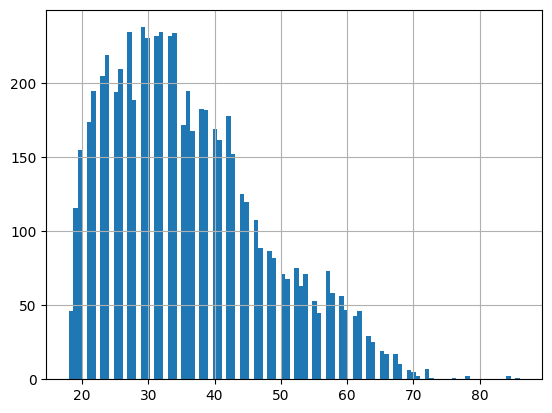

In [10]:
df.AGE.hist(bins=100)
plt.savefig('age_histogram_pandas.svg', format='svg')
plt.show()

In [131]:
#almost no-one as old as Trump. let's zoom in:
#how many people are as old as Trump? and how many are even older still?

df.query('AGE > 78')

#only three older than Trump!!!

,INMATEID,ADMITTED_DT,DISCHARGED_DT,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,INMATE_STATUS_CODE,SEALED,SRG_FLG,TOP_CHARGE,INFRACTION
215,20217710,2022-03-05 23:45:00,NaN,MED,Y,B,F,86.0,DE,N,N,125.25,N
827,20231757,2024-06-04 11:53:36,NaN,MIN,Y,W,M,84.0,SSR,N,N,460.20,N
2009,20085172,2021-12-03 12:02:29,NaN,MED,N,B,M,84.0,DE,N,N,125.20,N


## NOTE TO SELF

Maybe I can add some jokes about age. Like how many were a live when Trump did / said XYZ? Include a small timeline?

In [132]:
#let's speak prison wives
#how many men and women?
#how many in Trumps desired age bracket 

df.GENDER.value_counts()

GENDER
M    6020
F     392
Name: count, dtype: int64

## To do

Make a waffle chart showing how much his odds slink when men are filtered out

In [14]:
#let's just focus on women, much smaller sample size

prison_wives = df[df['GENDER'] == 'F']
prison_wives.head()

,INMATEID,ADMITTED_DT,DISCHARGED_DT,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,INMATE_STATUS_CODE,SEALED,SRG_FLG,TOP_CHARGE,INFRACTION
6,20192738,2024-05-15 17:09:17,NaN,MED,Y,I,F,29.0,DE,N,N,140.30,Y
15,20204598,2024-05-31 17:03:26,NaN,MAX,Y,O,F,25.0,DEP,N,N,160.15,N
19,20222538,2024-06-28 16:59:30,NaN,NaN,N,O,F,45.0,DE,N,N,215.50,N
53,61797,2024-04-18 16:49:11,NaN,MIN,Y,O,F,38.0,DE,N,N,140.25,N
55,20220283,2024-06-22 01:50:59,NaN,MED,N,B,F,35.0,DE,N,N,215.51,N


<Axes: >

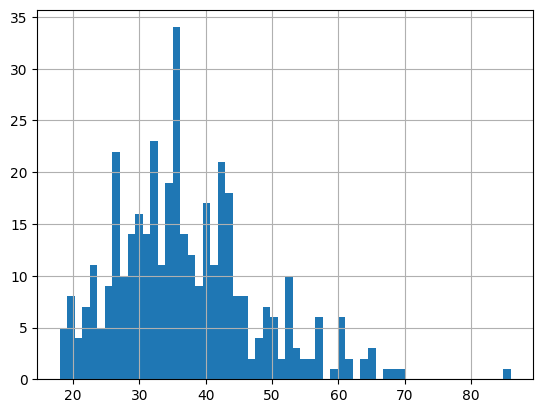

In [134]:
prison_wives.AGE.hist(bins=60)


In [135]:
prison_wives.AGE.describe()

count    392.000000
mean      37.043367
std       10.644723
min       18.000000
25%       30.000000
50%       36.000000
75%       42.000000
max       86.000000
Name: AGE, dtype: float64

In [136]:
#even though we know he likes women young, Melania is 54
#let's have some mercy and say 54 and younger are OK for him
#how many left?

# prison_wives.query("AGE < 55").value_counts

(prison_wives['AGE'] < 55).sum()

364

In [15]:
(prison_wives['AGE'] < 36).sum()

190

In [137]:
#what kind of crimes? value_counts
#these are the top 10 most common ones

df.TOP_CHARGE.value_counts().head(10)

TOP_CHARGE
125.25        876
110-125.25    558
160.15        467
120.05        389
265.03        385
140.25        235
140.20        235
160.10        208
120.10        174
220.16        160
Name: count, dtype: int64

In [138]:
#if I found out Trumps charge check how many buddies he has...

(df['TOP_CHARGE'] == 175.10).sum()

0

In [92]:
#I'm not sure it is really true that no-one is in Rikers for the same crime as Trump
#Let's see if it is encoded differently in this dataset

df['TOP_CHARGE'].str.contains("175").sum()

#so it seems like there is one other person!!! let's take a look at that case somehow

df[df['TOP_CHARGE'].str.contains("175", na=False)]

,INMATEID,ADMITTED_DT,DISCHARGED_DT,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,INMATE_STATUS_CODE,SEALED,SRG_FLG,TOP_CHARGE,INFRACTION
3634,20232213,2024-06-24 12:49:53,NaN,MIN,Y,B,M,45.0,DNS,N,N,175.35,N


In [93]:
#least common, 56 sentences that are so niche they have only been given once...

df.TOP_CHARGE.value_counts().tail(56)

TOP_CHARGE
221.25         1
110-250.45     1
150.10H        1
145.20         1
110-265.01     1
130.45         1
145.15         1
1192(2)-A      1
150.01         1
110-170.70     1
110-130.25     1
110-200.03     1
110-140.30     1
190.78         1
205.25         1
511-A(3)       1
130.67         1
1192.30        1
105.13         1
165.30         1
140.35         1
230.30         1
110-220.39     1
120.14H        1
140.25SM       1
110-170.25     1
175.35         1
121.13H        1
220.48         1
110-120.11     1
110-120.00     1
VTL 999.99     1
130.40         1
110-150.10     1
195.02         1
165.54         1
245.00         1
170.15         1
210.10         1
110-125.25H    1
120.02         1
110-121.12     1
190.25         1
140.40         1
110-125.26     1
VTL 1192.4A    1
170.40         1
120.04         1
120.06         1
240.20         1
470.20         1
120.70         1
125.25H        1
240.26         1
110-215.40     1
VTL 666.66     1
Name: count, dtype: int64

## Breakdown of the crime codes

### Top 10 most common crimes represented in Rikers:

1. 125.25: Murder in the second degree        
2. 110-125.25: Attempted murder in the second degree
3. 160.15: Robbert in the first degree       
4. 120.05: Assault in he second degree
5. 265.03: Criminal possession of a weapon in the second degree
6. 140.25: Burglary in the second degree
7. 140.20: Burglary in the third degree
8. 160.10: Robbery in the second degree
9. 120.10: Assault in the first degree
10. 220.16: Criminal possession of a controlled substance in the third degree

### Trump's penal code:

"Donald Trump was found guilty on 34 counts of falsifying business records in the first degree in connection with the hush money payment to Stormy Daniels. These charges are classified under New York Penal Law §175.10, which involves making false entries in business records with the intent to defraud and conceal other criminal activities.

The case revealed that Trump, along with his former attorney Michael Cohen and others, engaged in a scheme to cover up damaging information during the 2016 presidential election. This involved recording payments as legal expenses, which were actually reimbursements for hush money intended to suppress allegations of an affair.

For more details, you can check sources like FactCheck.org and Wikipedia."

Source: https://www.nysenate.gov/legislation/laws/PEN/175.10

In [94]:
#how many are part of a gang?
#SRG_FLG: SRG_FLG stands for Security Risk Group Flag. 
#This designation is used to identify inmates who are affiliated with gangs or other groups that pose a security risk within the prison. 
#Inmates with an SRG flag are subject to increased monitoring and may face restrictions to mitigate potential threats to safety 
#and order within the facility.

df.SRG_FLG.value_counts()

SRG_FLG
N    5100
Y    1327
Name: count, dtype: int64

In [95]:
#how about the mental health of the prisoners
#In the context of the NYC prison population, "BradH" refers to inmates who are part of a class defined 
#by the Brad H. v. City of New York settlement. 
#These individuals have been identified by mental health staff as having symptoms of mental illness. 
#The designation "BradH" indicates that these inmates have met with mental health professionals 
#and have been diagnosed with some form of mental health condition.

df.BRADH.value_counts()

BRADH
Y    3539
N    2888
Name: count, dtype: int64

In [96]:
#INFRACTION: In the context of the NYC prison population, an infraction refers to a minor violation of prison rules or regulations. 
#Infractions are less severe than misdemeanors and felonies and typically result in administrative actions 
#or penalties within the prison system, such as loss of privileges, rather than criminal charges.

df.INFRACTION.value_counts()

INFRACTION
N    4590
Y    1837
Name: count, dtype: int64

In [97]:
#CUSTODY_LEVEL: Custody Level refers to the security classification assigned to an inmate based on the perceived risk they pose 
#and their behavior. Common custody levels include minimum, medium, and maximum security. 
#These levels determine the degree of supervision and the types of facilities where inmates are housed, 
#influencing aspects such as freedom of movement, access to programs, and interaction with other inmates.

df.CUSTODY_LEVEL.value_counts()

CUSTODY_LEVEL
MED    2754
MIN    1976
MAX    1649
Name: count, dtype: int64

In [98]:
#RACE

df.RACE.value_counts()

RACE
B    3744
O    1953
W     507
A     141
U      47
I      20
Name: count, dtype: int64

<Axes: ylabel='RACE'>

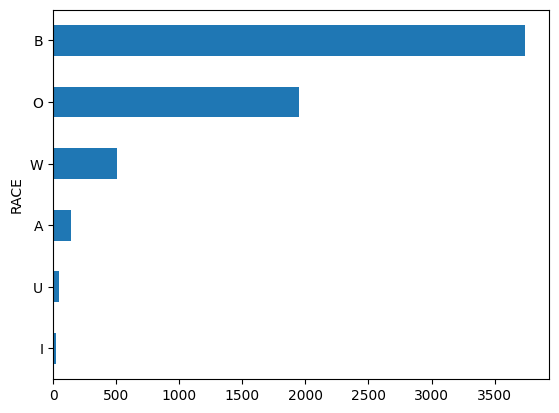

In [99]:
#Make a barchart of the race 

df.RACE.value_counts().sort_values(ascending=True).plot(kind='barh')

In [100]:
df.RACE.value_counts(normalize=True)

RACE
B    0.583905
O    0.304585
W    0.079070
A    0.021990
U    0.007330
I    0.003119
Name: proportion, dtype: float64

In [101]:
#ADMITTED_DATE --> turn into date time element
#remove all the times from the ADMITTED_DT


# Convert ADMITTED_DT to datetime format
df['ADMITTED_DT'] = pd.to_datetime(df['ADMITTED_DT'], format='%m/%d/%Y %H:%M:%S')

# Remove the time part, keeping only the date
df['ADMITTED_DT'] = df['ADMITTED_DT'].dt.date

# Display the DataFrame
print(df)

      INMATEID ADMITTED_DT  DISCHARGED_DT CUSTODY_LEVEL BRADH RACE GENDER  \
0        90432  2024-05-09            NaN           MIN     N    B      M   
1     20206183  2024-03-09            NaN           MAX     N    B      M   
2       160997  2024-06-12            NaN           MED     N    B      M   
3     20214579  2024-06-05            NaN           MIN     Y    O      M   
4        12292  2024-04-07            NaN           MAX     Y    B      M   
...        ...         ...            ...           ...   ...  ...    ...   
6422  20011202  2024-05-25            NaN           MED     Y    B      M   
6423     78616  2024-03-24            NaN           MIN     Y    O      M   
6424  20230073  2024-03-09            NaN           MED     Y    B      M   
6425    153468  2024-06-27            NaN           MED     Y    B      M   
6426  20222453  2023-12-12            NaN           MIN     Y    B      M   

       AGE INMATE_STATUS_CODE SEALED SRG_FLG TOP_CHARGE INFRACTION  
0     

In [104]:
#average prison sentence so far of the current prisoners / .describe()
#but first do current date minus ADMITTED_DT, and then turn that into a variable with a 
#number of days

# Define the current date aka the date that is the end limit of the dataset when I downloaded it
current_date = pd.to_datetime('07-01-2024').date()

In [108]:
# Calculate the sentence length in days

df['sentence_length'] = (current_date - df['ADMITTED_DT']).apply(lambda x: x.days)
df['sentence_length'].head()

0     53
1    114
2     19
3     26
4     85
Name: sentence_length, dtype: int64

In [110]:
#distribution

df.sentence_length.describe()

count    6427.000000
mean      242.367668
std       314.500277
min         0.000000
25%        45.000000
50%       125.000000
75%       315.000000
max      4264.000000
Name: sentence_length, dtype: float64

<Axes: >

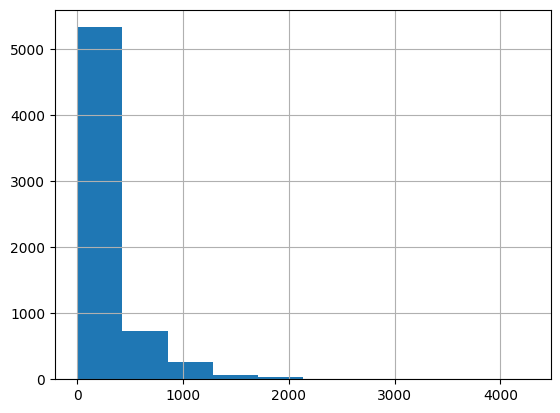

In [119]:
df.sentence_length.sort_values().hist()